# Modelos de Hierarchical Clustering

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos.  

In [35]:
# Importamos las librerias necesarias
import pandas as pd  # type: ignore # Para el manejo de datos
import numpy as np   # type: ignore # Para operaciones matemáticas
import matplotlib.pyplot as plt  # type: ignore # Para visualización de datos
import seaborn as sns  # type: ignore # Para visualización de datos más avanzada
from sklearn.preprocessing import StandardScaler  # type: ignore # Para estandarizar los datos
from sklearn.cluster import KMeans, AgglomerativeClustering  # type: ignore # Para los algoritmos de clustering
from sklearn import metrics  # type: ignore # Para evaluar la calidad de los clusters
from scipy.cluster.hierarchy import dendrogram, linkage  # type: ignore # Para crear dendrogramas
from sklearn.metrics import silhouette_score  # type: ignore # Para calcular el índice de silueta
from scipy.cluster.hierarchy import cophenet  # type: ignore # Para calcular el coeficiente de cophenet
from scipy.spatial.distance import pdist  # type: ignore # Para calcular distancias entre pares de puntos
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score # type: ignore
import warnings  # Para suprimir advertencias

# Configuramos para ignorar las advertencias
warnings.filterwarnings("ignore")


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  

In [36]:
#Cargamos el dataset
datos = pd.read_csv('./Mall_Customers.csv')
# Mostrar las primeras 10 filas de los datos
datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [37]:
datos.shape


(200, 5)

In [38]:
# Obtener un resumen estadístico de los datos (count, mean, std,min, max, quartiles 1 2 3)
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


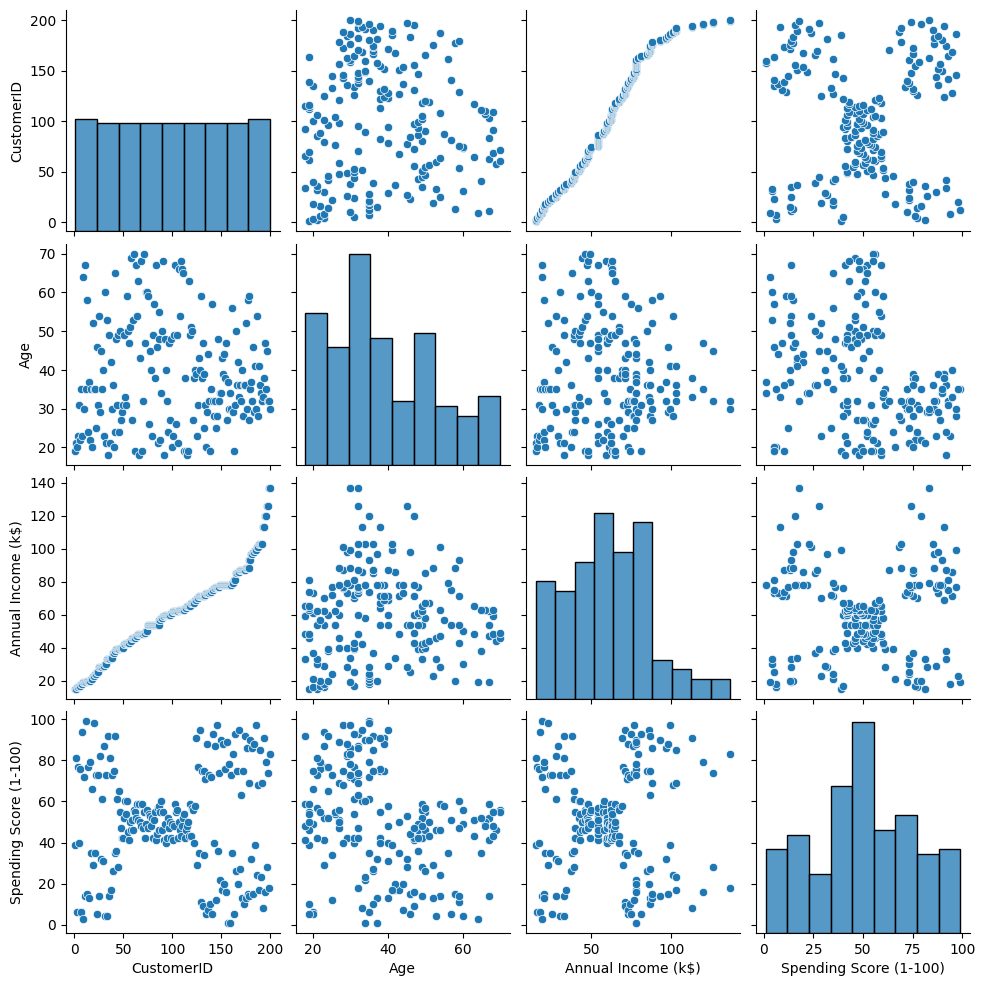

In [39]:
# Gráficos de dispersión para pares de variables
sns.pairplot(datos)
plt.show()

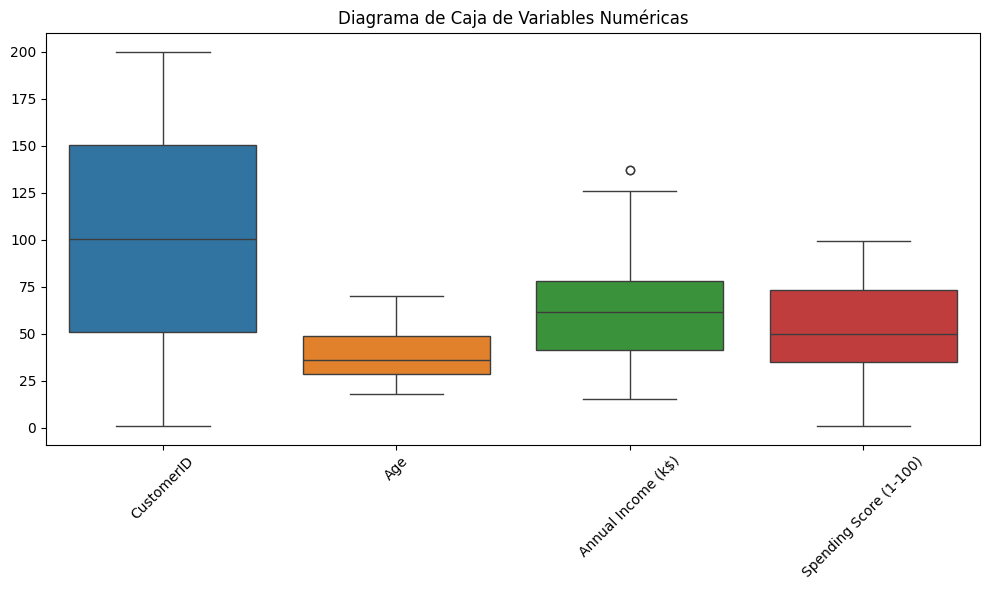

In [40]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  


In [41]:
# Verificar si hay valores faltantes
valores_faltantes = datos.isnull().sum()
print(valores_faltantes)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [42]:
# Crear un diccionario de mapeo en donde masculino es o y femenino es 1
mapeo_genero = {'Male': 0, 'Female': 1}

# Aplicar el mapeo a la columna de género
datos['Gender'] = datos['Gender'].map(mapeo_genero)

# Mostrar el DataFrame resultante
# Mostrar las primeras 10 filas de los datos
datos.head(10)

#

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


In [43]:
#conteo de datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna
datos_atipicos = ((datos < (Q1 - 1.5 * IQR)) | (datos > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna
print("Datos atípicos por columna:")
print(datos_atipicos)

Datos atípicos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


In [44]:
# Calcular el rango intercuartílico (IQR)
Q1 = datos.quantile(0.25)  # Primer cuartil
Q3 = datos.quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Definir el umbral para identificar valores atípicos
umbral = 1.7

# Identificar datos atípicos para cada columna
datos_atipicos = ((datos < (Q1 - umbral * IQR)) | (datos > (Q3 + umbral * IQR)))
datos_atipicosmostrar = ((datos < (Q1 - umbral * IQR)) | (datos > (Q3 + umbral * IQR))).sum()

# Eliminar filas que contienen valores atípicos en al menos una columna
Datos_limpios = datos[~datos_atipicos.any(axis=1)]

# Mostrar la forma del DataFrame después de eliminar datos atípicos
print("Forma del DataFrame después de eliminar datos atípicos:", Datos_limpios.shape)

# Mostrar el número de valores atípicos que quedaron después de la eliminación
valores_atipicos_quedan = datos_atipicos.sum().sum()
print("Número de valores atípicos que quedan después de la eliminación:", valores_atipicos_quedan)

print("Datos atípicos por columna:")
print(datos_atipicosmostrar)

Forma del DataFrame después de eliminar datos atípicos: (200, 5)
Número de valores atípicos que quedan después de la eliminación: 0
Datos atípicos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


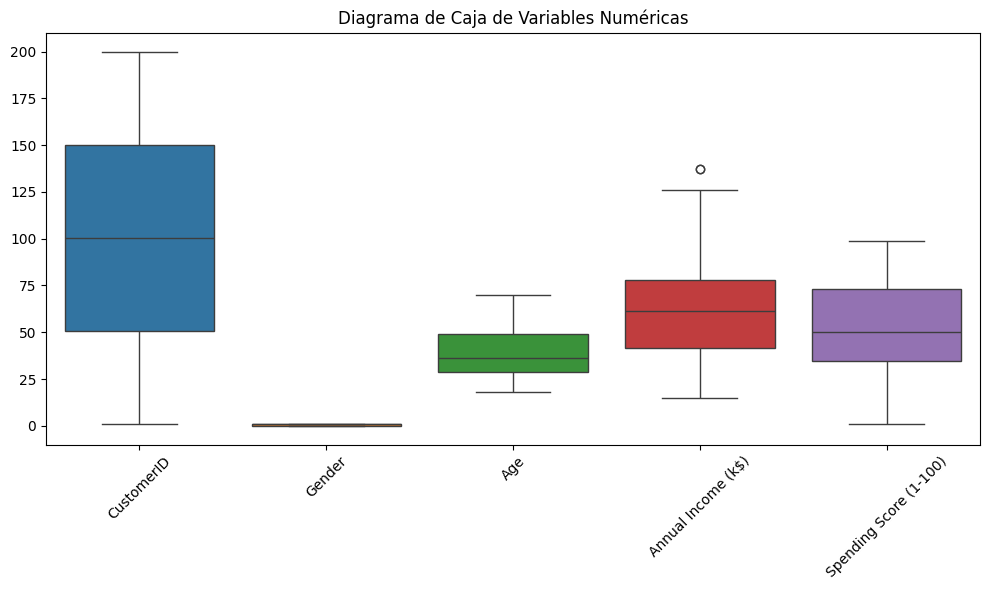

In [45]:
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 


In [46]:
# Filtrar columnas del modelo y verificamos
datos = datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]
print(datos)


     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


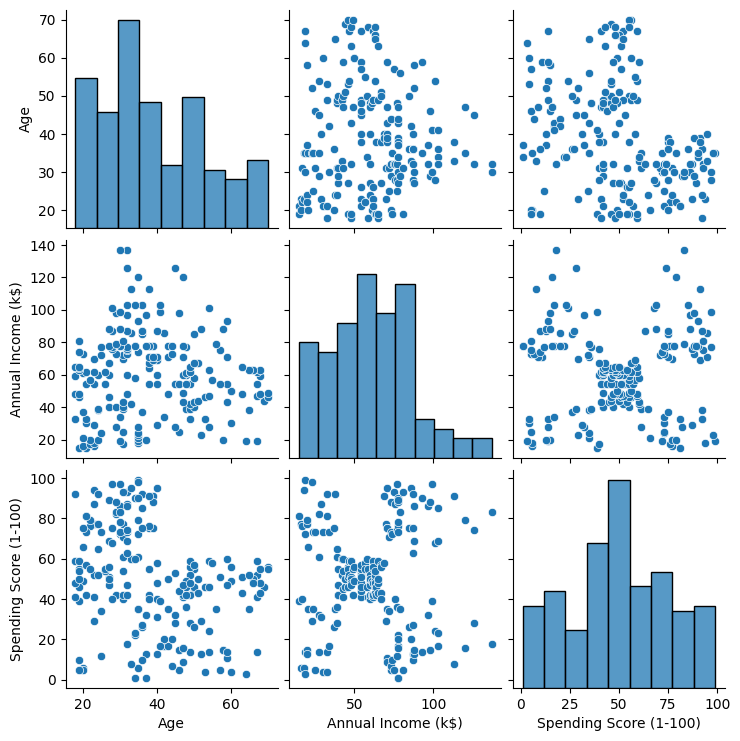

In [47]:
# Gráficos de dispersión para pares de variables
sns.pairplot(datos)
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros. 


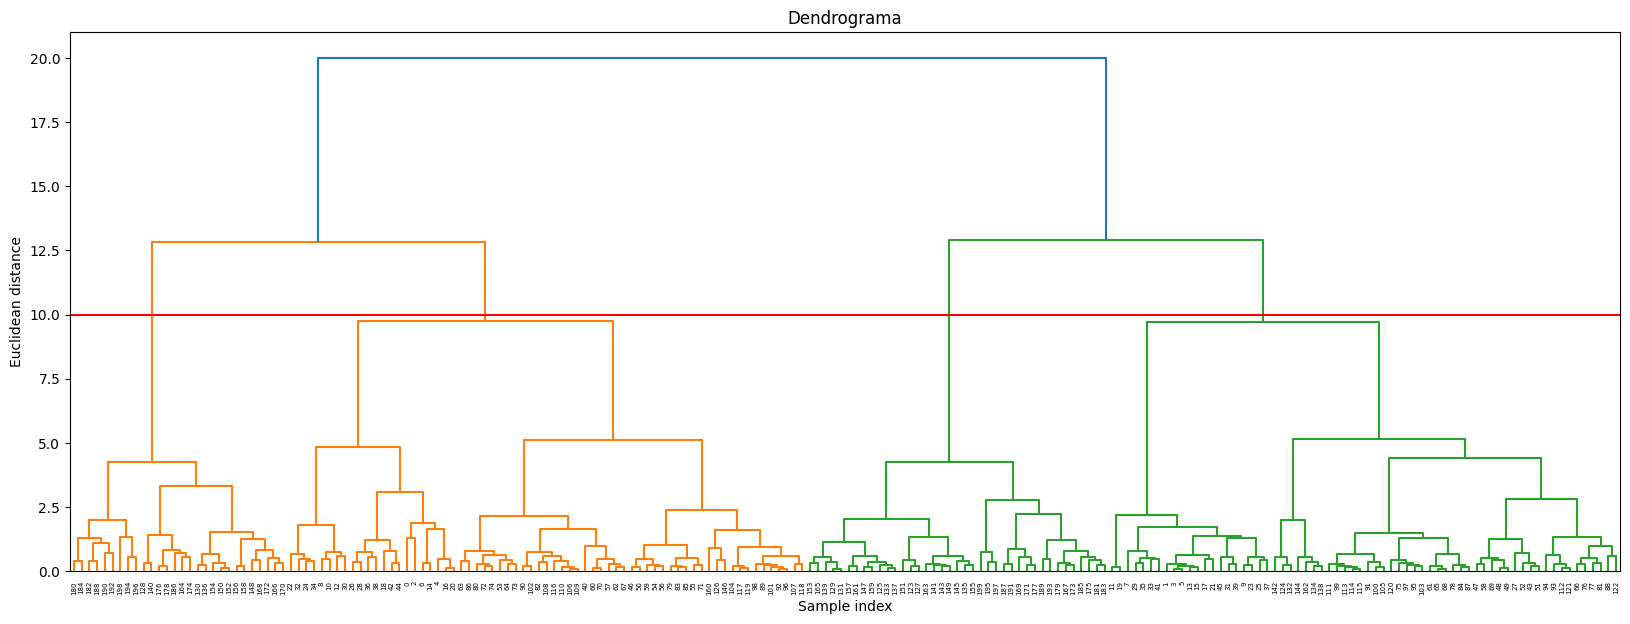

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(datos), columns = datos.columns)

ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [49]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [50]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

# Obtenemos las etiquetas de cada punto de nuestros datos
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])


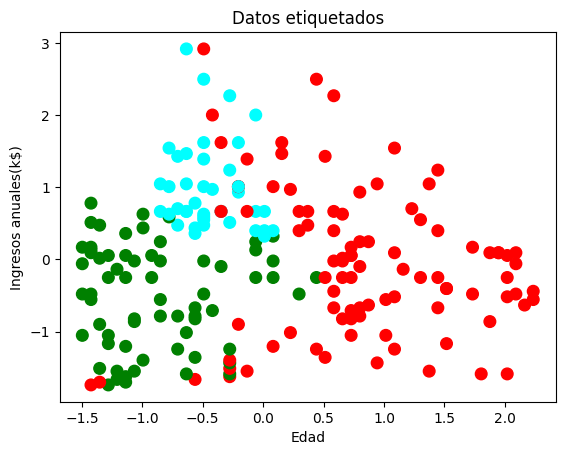

In [51]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales(k$)')
plt.show()


In [52]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram # type: ignore
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

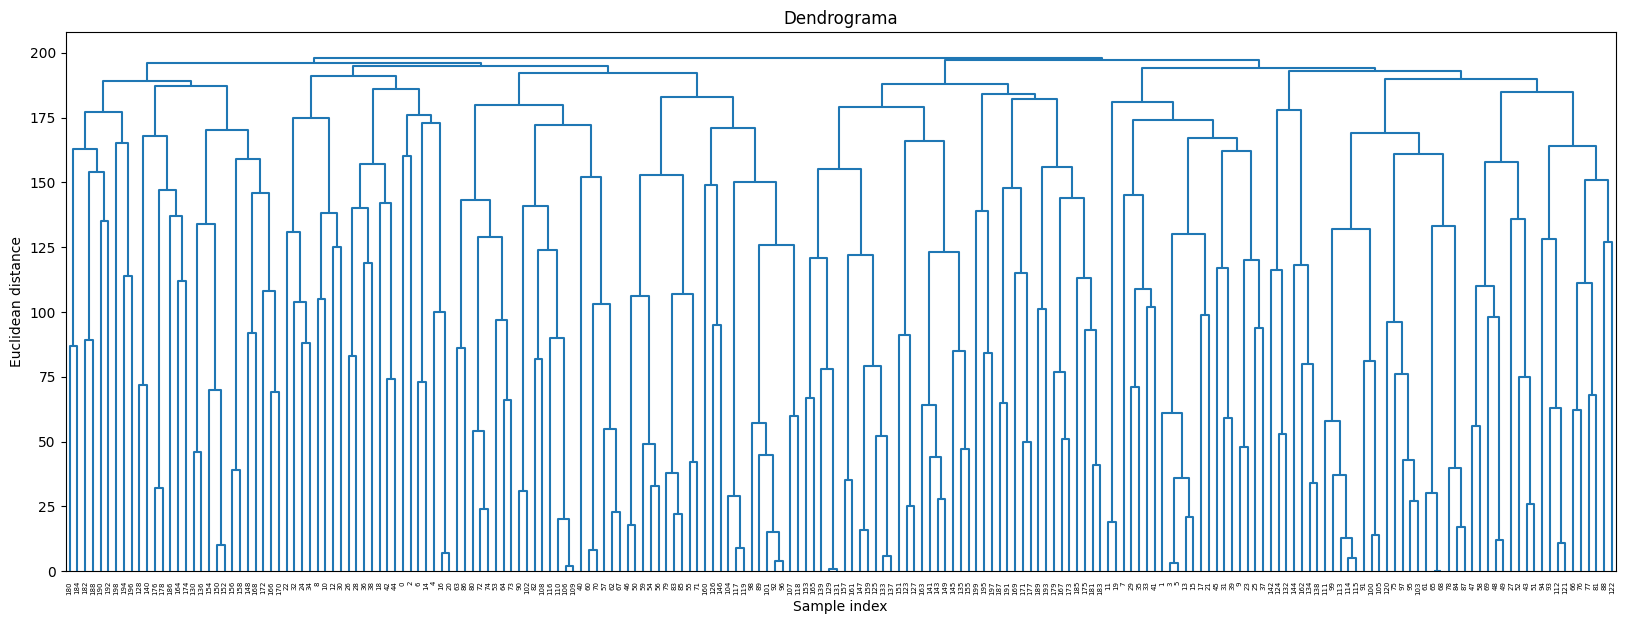

In [53]:
plot_dendrogram(hier_clustering, color_threshold=0)

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 


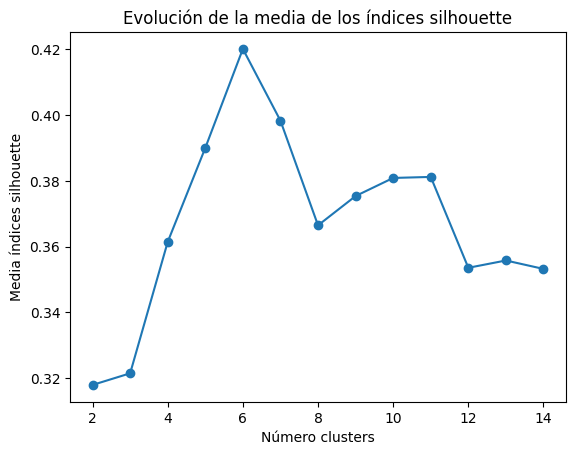

In [54]:
from sklearn.cluster import AgglomerativeClustering # type: ignore
from sklearn.metrics import silhouette_score # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    linkage    = 'ward',  # Tipo de enlace
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Graficar la evolución de la media de los índices silhouette
plt.plot(range_n_clusters, valores_medios_silhouette, marker='o')
plt.title("Evolución de la media de los índices silhouette")
plt.xlabel('Número clusters')
plt.ylabel('Media índices silhouette')
plt.show()


In [55]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Davies-Bouldin Index: 1.1277290061047862


In [56]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage # type: ignore
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6261774947075186, array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 


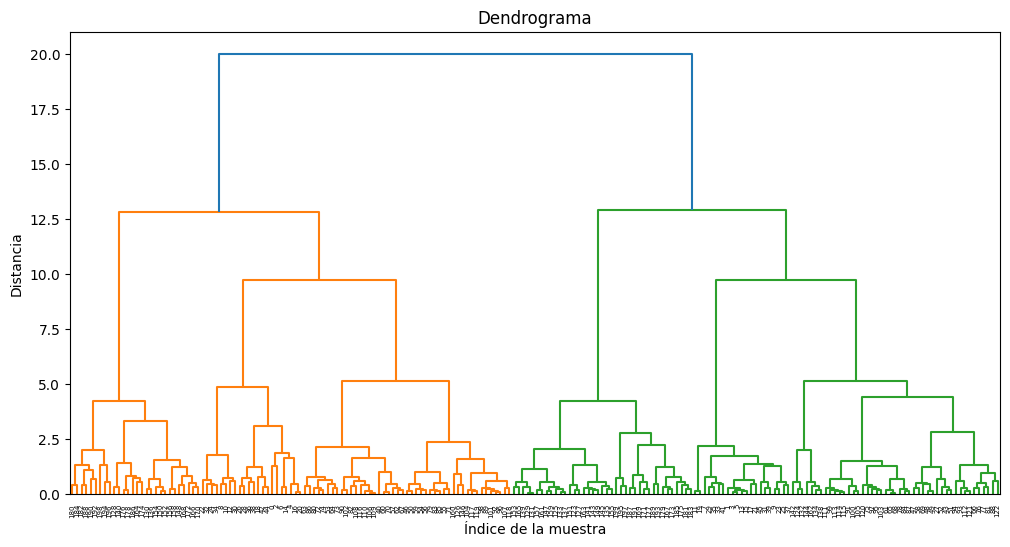

In [57]:

# Calcular el enlace jerárquico
enlace = linkage(X, method='ward')
# Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(enlace)
plt.title('Dendrograma')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

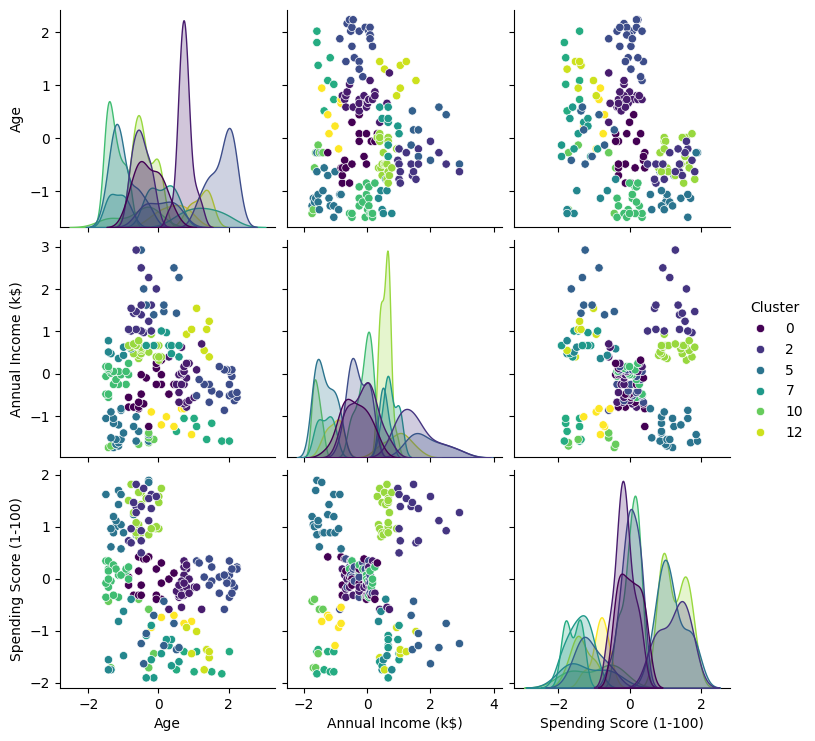

In [58]:
import seaborn as sns

# Agregar las etiquetas de los clusters al DataFrame de datos
X['Cluster'] = cluster_labels

# Crear un gráfico de pares con las características y colorear por cluster
sns.pairplot(X, hue='Cluster', palette='viridis')
plt.show()


## 7. Interpretar, analizar y documentar los resultados obtenidos.  

El gráfico muestra cómo varía la media del índice silhouette a medida medida que se incrementa el número de clusters. Este índice oscila entre aproximadamente 0.32 y 0.42, siendo su valor máximo alrededor de 6 o 7 clusters. Un índice silhouette más cercano a 1 indica una mejor separación entre los clusters.
Las métricas complementarias confirman una calidad moderada del clustering:

* Puntaje de silueta: 0.321. Este valor relativamente bajo sugiere que la separación entre los clusters no es óptima. Idealmente, se busca un valor más cercano a 1.
* Índice de Calinski-Harabasz: 88.10. Este índice mide la relación entre la dispersión dentro de los clusters y la dispersión entre clusters. Un valor más alto es deseable y, en este caso, el valor obtenido es moderado.
* Índice de Davies-Bouldin: 1.128. Esta métrica cuantifica la similitud promedio entre cada cluster y su cluster más parecido. Un valor más bajo es mejor, por lo que el valor obtenido de 1.128 indica una similitud considerable entre algunos de los clusters.

Relación entre la edad y los ingresos anuales

* El panel superior izquierdo del gráfico muestra una relación positiva entre la edad y los ingresos anuales. Esto significa que, a medida que las personas envejecen, tienden a ganar más dinero. Esta relación es consistente con la expectativa de que las personas acumulan experiencia y habilidades a lo largo de su vida laboral, lo que les permite obtener mayores ingresos.

Relación entre la edad y la puntuación de gastos

* El panel superior derecho del gráfico muestra una relación negativa entre la edad y la puntuación de gastos. Esto significa que, a medida que las personas envejecen, tienden a gastar menos dinero. Esta relación puede explicarse por varios factores, como el aumento de los ahorros, la disminución de las necesidades y la reducción del apetito por el riesgo.

Relación entre los ingresos anuales y la puntuación de gastos

* El panel inferior del gráfico muestra una relación positiva entre los ingresos anuales y la puntuación de gastos. Esto significa que, a medida que las personas ganan más dinero, tienden a gastar más dinero. Esta relación es consistente con la expectativa de que las personas con mayores ingresos tienen más capacidad para gastar en bienes y servicios.